# Application of k-Nearest Neighbor
* 특장점
  * 가장 간단한 Lazy learing 알고리즘에 속함
  * 구하고자 하는 값의 주변 k개의 값만 고려하므로, 아웃라이어에 덜 민감함
* 단점
  * Column 마다 scale이 다르면 편향이 발생하기 때문에 수치 형식의 데이터들의 값을 정규화하는 과정이 필수적임
  * Lazy model이므로, feature와 label 간 관계를 이해하기 제한적임
  * 노이즈에 민감함


## kNN with Iris dataset

### Setup

In [3]:
# Common imports
import sklearn
import numpy as np

### Datasets

#### Iris Dataset
* The iris dataset is a classic and very easy multi-class classification dataset.
* Classes
  * Versicolor
  * Setosa
  * Virginica
* Features
  * Sepal length
  * Sepal width
  * petal length
  * petal width

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_feature_names = iris.feature_names
iris_class_names = iris.target_names

print('Number of targets: ',len(iris_class_names))

# combine features and class data
iris_np = np.append(iris_X, iris_y.reshape(-1,1), axis=1)
iris_col_names = iris_feature_names + ['class']

iris_pd = pd.DataFrame(iris_np, columns=iris_col_names)
iris_pd.head(3)

Number of targets:  3


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


#### Dataset Visualization

* correlation of features

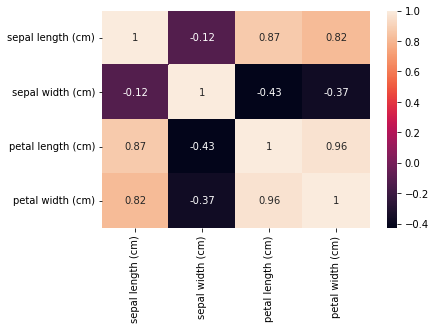

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

iris_X_pd = pd.DataFrame(iris_X, columns=iris_feature_names)
sns.heatmap(iris_X_pd.corr(),annot=True)
plt.show()

* Pairwise relationships in a dataset

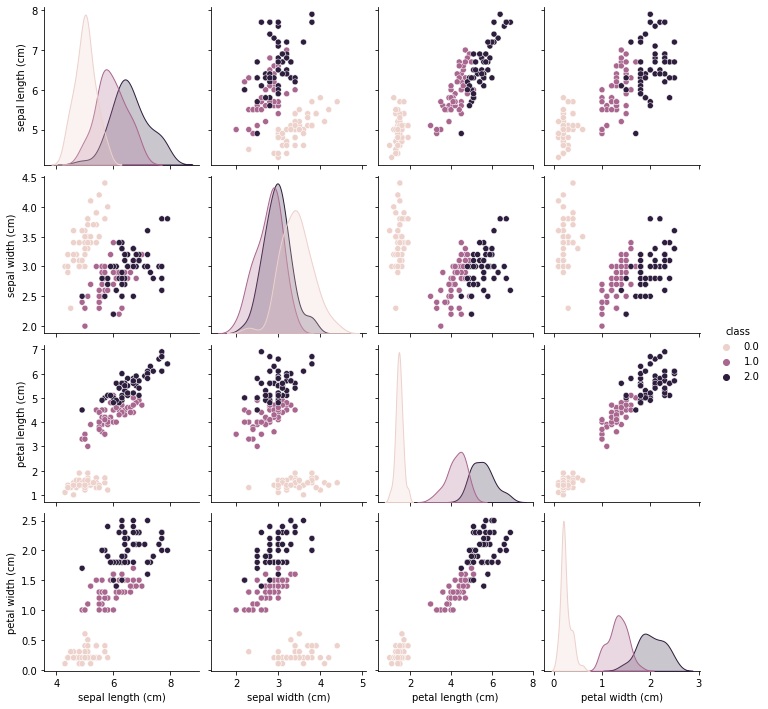

In [6]:
sns.pairplot(iris_pd, hue="class")
plt.show()

### K-Nearest Neighbor Classifier

**- sklearn.neighbors.[KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) : Returns the instance itself**

Classifier implementing the k-nearest neighbors vote.

In [7]:
# Default model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

#### train_test_split

In [8]:
from sklearn.model_selection import train_test_split
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, random_state=42)

#### Comparison with features

In [9]:
from sklearn import metrics

for idx, feature in enumerate(iris_feature_names):
  knn_model.fit(iris_X_train[:,[idx]], iris_y_train)
  predict = knn_model.predict(iris_X_test[:,[idx]])
  acc = metrics.accuracy_score(iris_y_test, predict)
  print('Test Accuracy({}): {}'.format(feature,acc))

Test Accuracy(sepal length (cm)): 0.7631578947368421
Test Accuracy(sepal width (cm)): 0.5
Test Accuracy(petal length (cm)): 0.9473684210526315
Test Accuracy(petal width (cm)): 1.0


#### Comparison with Scaling and witout Scaling

In [10]:
# sepal length (mm)
iris_X_train_mm_feature = iris_X_train[:,[0]]*100
iris_X_test_mm_feature = iris_X_test[:,[0]]*100
# sepal width (cm)
iris_X_train_cm_feature = iris_X_train[:,[1]]
iris_X_test_cm_feature = iris_X_test[:,[1]]

# combine two features
iris_X_train_two_features = np.append(iris_X_train_mm_feature, iris_X_train_cm_feature, axis=1)
iris_X_test_two_features = np.append(iris_X_test_mm_feature, iris_X_test_cm_feature, axis=1)

# Dafault model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler() # choose scaler
iris_X_train_scale = scaler.fit_transform(iris_X_train_two_features)
iris_X_test_scale = scaler.transform(iris_X_test_two_features)

knn_model.fit(iris_X_train_two_features, iris_y_train)
predict = knn_model.predict(iris_X_test_two_features)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(without scaling): {}'.format(acc))

knn_model.fit(iris_X_train_scale, iris_y_train)
predict = knn_model.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(with    scaling): {}'.format(acc))

Test Accuracy(without scaling): 0.7368421052631579
Test Accuracy(with    scaling): 0.7894736842105263


* visualization 공통 함수

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

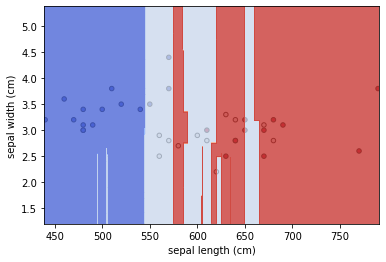

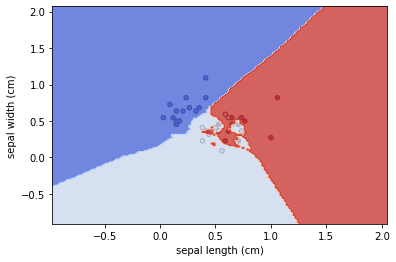

In [12]:
# Dafault model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_model.fit(iris_X_train_two_features, iris_y_train)

plt.scatter(iris_X_test_two_features[:, 0], iris_X_test_two_features[:, 1], c=iris_y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k');
xx, yy = make_meshgrid(iris_X_test_two_features[:, 0], iris_X_test_two_features[:, 1])
plot_contours(knn_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.xlabel(iris_feature_names[0])
plt.ylabel(iris_feature_names[1])
plt.show()

knn_model.fit(iris_X_train_scale, iris_y_train)

plt.scatter(iris_X_test_scale[:, 0], iris_X_test_scale[:, 1], c=iris_y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k');
xx, yy = make_meshgrid(iris_X_test_scale[:, 0], iris_X_test_scale[:, 1])
plot_contours(knn_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.xlabel(iris_feature_names[0])
plt.ylabel(iris_feature_names[1])
plt.show()

#### Set parameters(n_neighbors, metric, weights)

**n_neighbors**
* int, default=5
* Number of neighbors to use by default for kneighbors queries

**metric**
* default='minkowski'
* The distance metric to use for the tree. 
  * 'euclidean'
  * 'manhattan'
  * 'chebyshev'
  * 'minkowski'
  * 'wminkowski'
  * 'seuclidean'
  * 'mahalanobis'

**weights**
* default='uniform'
* Weight function used in prediction. 
  * 'uniform': uniform weights. All points in each neighborhood are weighted equally.
  * 'distance': weight points by the inverse of their distance
  * [callable]: a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights

##### set_paprams

* n_neighbors 1 VS 6

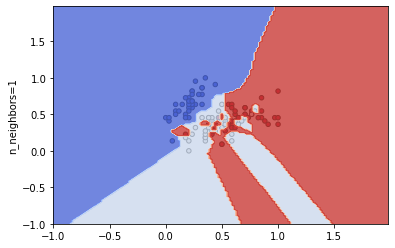

train Accuracy(n_neighbors=1): 0.9553571428571429
Test Accuracy(n_neighbors=1): 0.7368421052631579


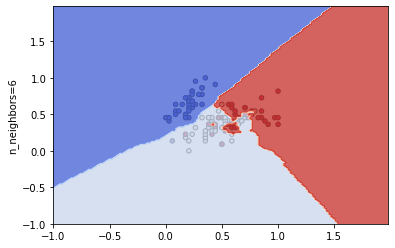

train Accuracy(n_neighbors=6): 0.8125
Test Accuracy(n_neighbors=6): 0.8157894736842105


In [13]:
# Dafault model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

# n_neighbors=1
knn_model.set_params(n_neighbors=1)
knn_model.fit(iris_X_train_scale, iris_y_train)

plt.scatter(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1], c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k');
xx, yy = make_meshgrid(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1])
plot_contours(knn_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.ylabel('n_neighbors=1')
plt.show()

predict = knn_model.predict(iris_X_train_scale)
acc = metrics.accuracy_score(iris_y_train, predict)
print('train Accuracy(n_neighbors=1): {}'.format(acc))
predict = knn_model.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(n_neighbors=1): {}'.format(acc))

# n_neighbors=6
knn_model.set_params(n_neighbors=6)
knn_model.fit(iris_X_train_scale, iris_y_train)

plt.scatter(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1], c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k');
xx, yy = make_meshgrid(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1])
plot_contours(knn_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.ylabel('n_neighbors=6')
plt.show()

predict = knn_model.predict(iris_X_train_scale)
acc = metrics.accuracy_score(iris_y_train, predict)
print('train Accuracy(n_neighbors=6): {}'.format(acc))
predict = knn_model.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(n_neighbors=6): {}'.format(acc))

* metric 'euclidean' VS 'manhattan'

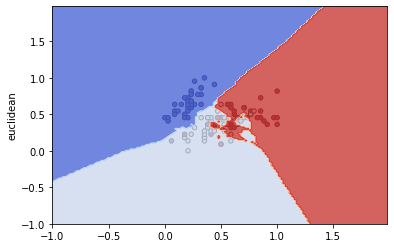

train Accuracy(euclidean): 0.8303571428571429
Test Accuracy(euclidean): 0.7894736842105263


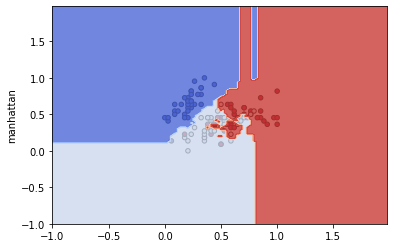

train Accuracy(manhattan): 0.8035714285714286
Test Accuracy(manhattan): 0.7894736842105263


In [14]:
# Dafault model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

# metric='euclidean'
knn_model.set_params(metric='euclidean')
knn_model.fit(iris_X_train_scale, iris_y_train)

plt.scatter(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1], c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k');
xx, yy = make_meshgrid(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1])
plot_contours(knn_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.ylabel('euclidean')
plt.show()

predict = knn_model.predict(iris_X_train_scale)
acc = metrics.accuracy_score(iris_y_train, predict)
print('train Accuracy(euclidean): {}'.format(acc))
predict = knn_model.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(euclidean): {}'.format(acc))

# metric= 'manhattan'
knn_model.set_params(metric= 'manhattan')
knn_model.fit(iris_X_train_scale, iris_y_train)

plt.scatter(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1], c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k');
xx, yy = make_meshgrid(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1])
plot_contours(knn_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.ylabel('manhattan')
plt.show()

predict = knn_model.predict(iris_X_train_scale)
acc = metrics.accuracy_score(iris_y_train, predict)
print('train Accuracy(manhattan): {}'.format(acc))
predict = knn_model.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(manhattan): {}'.format(acc))

* weights 'uniform' VS 'distance'

In [ ]:
# Dafault model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

# weights='uniform'
knn_model.set_params(weights='uniform')
knn_model.fit(iris_X_train_scale, iris_y_train)

plt.scatter(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1], c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k');
xx, yy = make_meshgrid(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1])
plot_contours(knn_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.ylabel('uniform')
plt.show()

predict = knn_model.predict(iris_X_train_scale)
acc = metrics.accuracy_score(iris_y_train, predict)
print('train Accuracy(uniform): {}'.format(acc))
predict = knn_model.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(uniform): {}'.format(acc))

# weights='distance'
knn_model.set_params(weights='distance')
knn_model.fit(iris_X_train_scale, iris_y_train)

plt.scatter(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1], c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k');
xx, yy = make_meshgrid(iris_X_train_scale[:, 0], iris_X_train_scale[:, 1])
plot_contours(knn_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.ylabel('distance')
plt.show()

predict = knn_model.predict(iris_X_train_scale)
acc = metrics.accuracy_score(iris_y_train, predict)
print('train Accuracy(distance): {}'.format(acc))
predict = knn_model.predict(iris_X_test_scale)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(distance): {}'.format(acc))

#### Validation_curve

**- sklearn.model_selection.[validation_curve(estimator, X, y, *, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=None, pre_dispatch='all', verbose=0, error_score=nan, fit_params=None)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) : Returns Scores on training sets and Scores on test set.**

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this will also compute training scores and is merely a utility for plotting the results.

* Visualization 함수

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# 수치형 파라미터 시각화 함수
def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

# 범주형 파라미터 시각화 함수
def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.9, np.max(test_mean)*1.1])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

**n_neighbors**
* int, default=5
* Number of neighbors to use by default for kneighbors queries

In [ ]:
from sklearn.model_selection import validation_curve
param_range= [i for i in range(1,10)]
param_name='n_neighbors'

# Dafault model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()


# non-scaled
train_scores, test_scores = validation_curve(
                estimator=knn_model, 
                X=iris_X, 
                y=iris_y, 
                param_name=param_name, 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, False)

# scaled
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = RobustScaler() # choose scaler
iris_X_scaled = scaler.fit_transform(iris_X)

train_scores_scaled, test_scores_scaled = validation_curve(
                estimator=knn_model, 
                X=iris_X_scaled, 
                y=iris_y, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores_scaled, axis=1)
train_std = np.std(train_scores_scaled, axis=1)
test_mean = np.mean(test_scores_scaled, axis=1)
test_std = np.std(test_scores_scaled, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, False)

## kNN with California Housing dataset [중간 연습]

### Setup

In [ ]:
# Common imports
import sklearn
import numpy as np

### Datasets

#### California Housing dataset

* The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars.
* target값을 $100,000 기준으로 반올림하여 6개의 class로 범주화 함

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
housing_X = housing.data
housing_y = np.round(housing.target).astype(int) # make y discrete
housing_feature_names = housing.feature_names

print('Number of target: ',len(set(housing_y)))

# combine features and class data
housing_np = np.append(housing_X, housing_y.reshape(-1,1), axis=1)
housing_col_names = housing_feature_names + ['class']

housing_pd = pd.DataFrame(housing_np, columns=housing_col_names)
housing_pd.head(3)

#### Validation_curve

* Visualization 함수

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# 수치형 파라미터 시각화 함수
def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

# 범주형 파라미터 시각화 함수
def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.9, np.max(test_mean)*1.1])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Set parameters(n_neighbors, metric, weights)

**n_neighbors**
* int, default=5
* Number of neighbors to use by default for kneighbors queries

**metric**
* default='minkowski'
* The distance metric to use for the tree. 
  * 'euclidean'
  * 'manhattan'
  * 'chebyshev'
  * 'minkowski'
  * 'wminkowski'
  * 'seuclidean'
  * 'mahalanobis'

**weights**
* default='uniform'
* Weight function used in prediction. 
  * 'uniform': uniform weights. All points in each neighborhood are weighted equally.
  * 'distance': weight points by the inverse of their distance
  * [callable]: a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights

**<font color='red'>파라미터의 범위를 지정하여, test accuracy가 가장 높은 파라미터 값을 찾으시오</font>**

In [ ]:
from sklearn.model_selection import validation_curve

param_name='n_neighbors' # 파라미터 지정
param_range= [i for i in range(1,10)] # 파라미터의 범위 지정

# Dafault model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

train_scores, test_scores = validation_curve(
                estimator=knn_model, 
                X=housing_X, 
                y=housing_y, 
                param_name=param_name, 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, False)

# Exercise

## 1번 문제
kNN model을 사용하여 wine 데이터를 분류 하시오.
  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * n_neighbors
    * weights
    * algorithm 
    * p
  * 가장 높은 accuracy를 기록하는 파리미터 조합을 도출하시오.

  

#### Wine dataset

```python
#load data
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
wine_X = wine.data
wine_y = wine.target

wine_feature_name = wine.feature_names
print('Number of targets: ',len(set(wine_y)))

pd.DataFrame(wine_X, columns=wine_feature_name).head(3)
```



## 1번 문제 답안

## 2번 문제

kNN model을 사용하여 breast cancer 데이터를 분류 하시오.
  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * n_neighbors
    * weights
    * algorithm 
    * p
  * 가장 높은 accuracy를 기록하는 파리미터 조합을 도출하시오.

#### Breast cancer dataset
* The breast cancer dataset is a classic and very easy binary classification dataset.



  ```python
  from sklearn import datasets
  import pandas as pd

  breast = datasets.load_breast_cancer()
  breast_X = breast["data"]
  breast_y = breast["target"]
  breast_feature_name = breast.feature_names

  pd.DataFrame(breast_X, columns=breast_feature_name).head(5)
  ```



## 2번 문제 답안